In [84]:
import numpy as np 
import pandas as pd

In [85]:
import pandas as pd

df = pd.read_csv('spam.csv', encoding='latin1')  # Try with latin1 first
df.sample(5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1239,ham,Hope you are having a great new semester. Do w...,NaN,NaN,NaN
5190,spam,Our records indicate u maybe entitled to 5000 ...,NaN,NaN,NaN
1496,ham,I'm always on yahoo messenger now. Just send t...,NaN,NaN,NaN
1758,ham,Sorry i'm not free...,NaN,NaN,NaN
3177,ham,K k :-):-) then watch some films.,NaN,NaN,NaN


In [86]:
df.shape

(5572, 5)

In [87]:
# DATA CLEANING
# EDA
# TEXT PREPROCESSING
# MODEL BUILDING
# EVALUATION
# IMPROVEMENT 
# WEBSITE
# DEPLOY

In [88]:
## 1.Data Cleaning

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [90]:
# Drop the last 3 columns by their names
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)


In [91]:
# renaming the cols
df.rename(columns = {'v1' : 'target','v2' : 'text' } , inplace = True)
df.sample(5)

,target,text
2671,ham,"That's cool, I'll come by like &lt;#&gt; ish"
791,ham,All e best 4 ur driving tmr :-)
115,ham,"As I entered my cabin my PA said, '' Happy B'd..."
430,ham,At home watching tv lor.
200,ham,I sent you &lt;#&gt; bucks


In [92]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [93]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [94]:
# missing vlaues
df.isnull().sum()

target    0
text      0
dtype: int64

In [95]:
df.duplicated().sum()

np.int64(403)

In [96]:
df = df.drop_duplicates(keep='first')

In [97]:
df.shape

(5169, 2)

In [98]:
# EDA

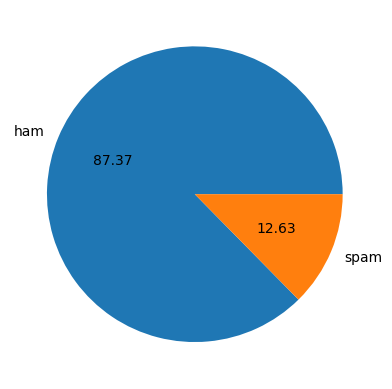

In [99]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham','spam'],autopct = '%0.2f')
plt.show()

In [100]:
# Data is imblanced
import nltk

In [101]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [162]:
# Creating columns. First column is for number of word. Second column is for number of sms 3rd column is for number of character 

In [165]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [166]:
df['num_characters'] = df['text'].apply(len)

In [167]:
df.head()

,target,text,num_words,num_sentences,transformed_text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",24,2,go jurong point crazi avail bugi n great world...,111
1,0,Ok lar... Joking wif u oni...,8,2,ok lar joke wif u oni,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,free entri 2 wkli comp win fa cup final tkt 21...,155
3,0,U dun say so early hor... U c already then say...,13,1,u dun say earli hor u c alreadi say,49
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,nah think goe usf live around though,61


In [118]:
df = df.drop(columns=['num_characters'])
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df[['num_words' ,'num_sentences' ,'num_characters']].describe()

In [ ]:
# ham
df[df['target'] == 0] [['num_words' ,'num_sentences' ,'num_characters']].describe()

In [ ]:
# spam
df[df['target'] == 1] [['num_words' ,'num_sentences' ,'num_characters']].describe()

In [106]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

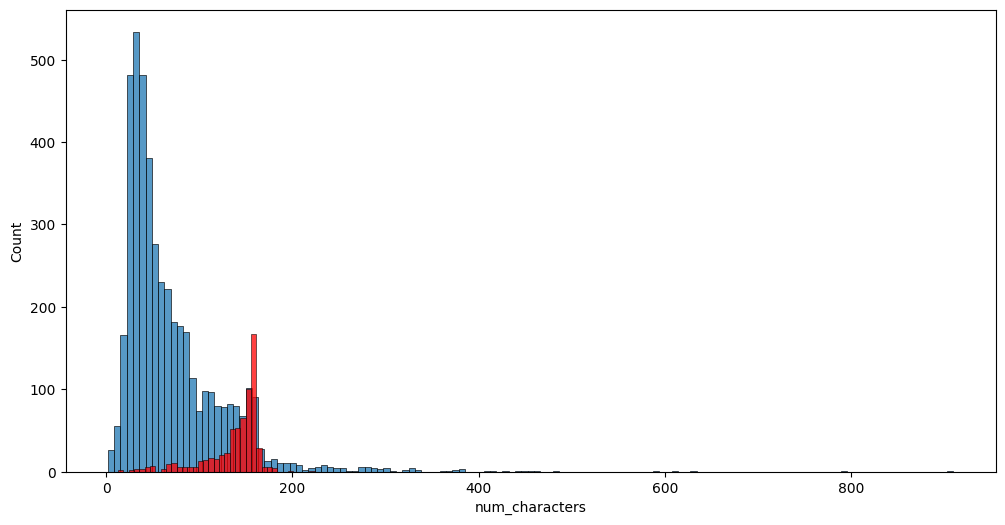

In [107]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color ='red')

<Axes: xlabel='num_words', ylabel='Count'>

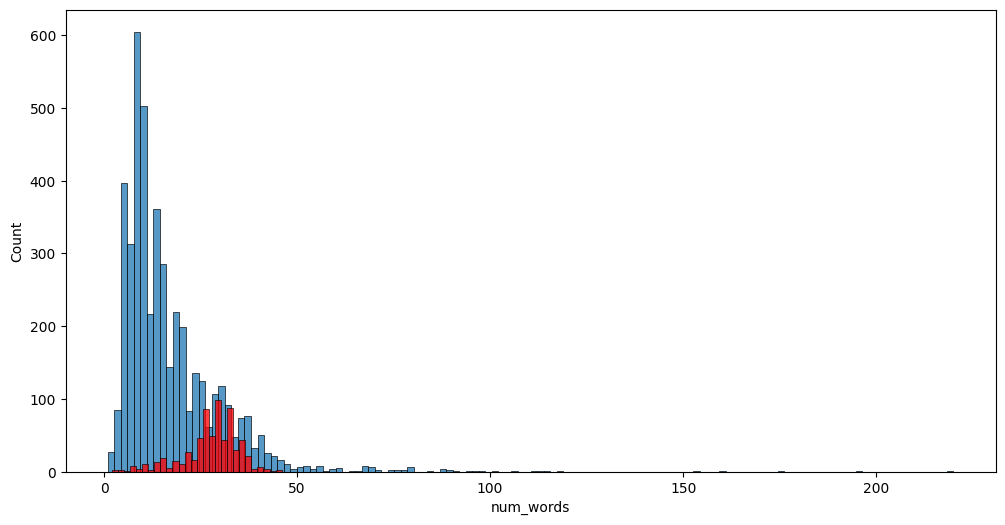

In [108]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color ='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

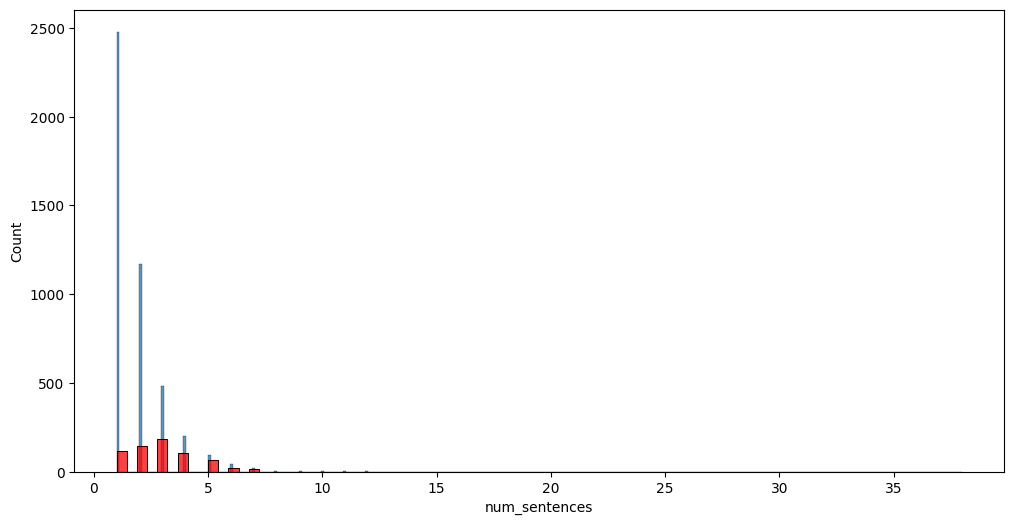

In [119]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'],color ='red')

In [ ]:
sns.pairplot(df,hue='target')

In [ ]:
# Keep only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [154]:
# Data pre processing
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y =[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y [:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)


In [155]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [156]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [157]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')


'love'

In [158]:
transform_text('I love the youtube video, which. I don\'t like')

'love youtub video like'

In [172]:
df['transformed_text'] = df['text'].apply(transform_text)


In [174]:
df.head()

,target,text,num_words,num_sentences,num_characters,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,2,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,1,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61,nah think goe usf live around though


In [180]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=1000, min_font_size=10, background_color='white')

In [181]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

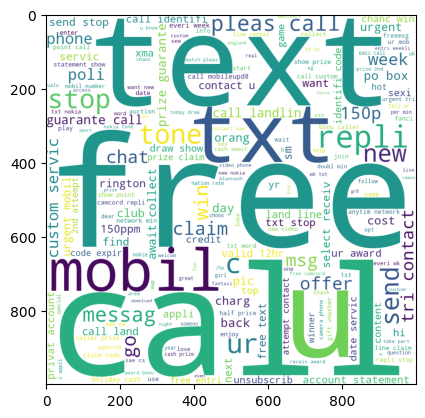

In [182]:
plt.imshow(spam_wc)

In [183]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

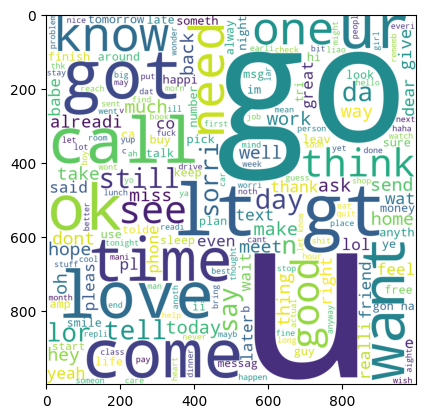

In [184]:
plt.imshow(ham_wc)

In [187]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [188]:
len(spam_corpus)

9939

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

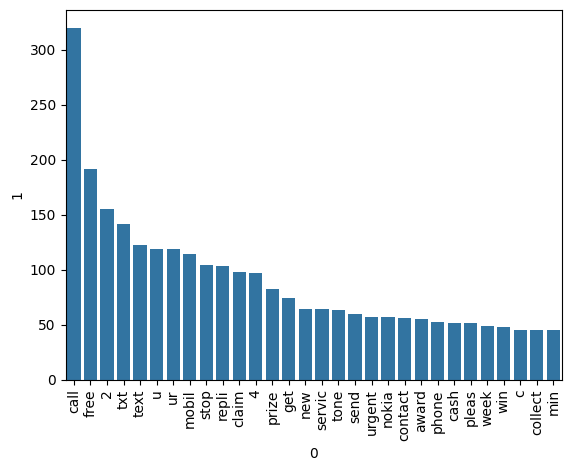

In [195]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], 
            y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

In [198]:
plt.show()

In [199]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [200]:
len(ham_corpus)

35404

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

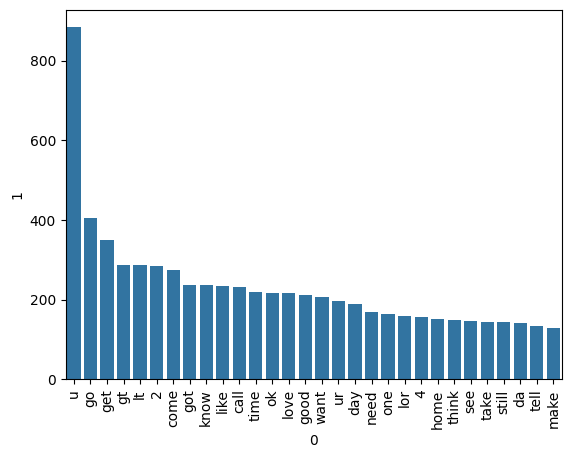

In [201]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], 
            y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

In [352]:
df.head()

,target,text,num_words,num_sentences,num_characters,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,2,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,1,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61,nah think goe usf live around though


In [353]:
# Model building
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [354]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [355]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [356]:
y = df['target'].values

In [357]:
from sklearn.model_selection import train_test_split

In [358]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [359]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [360]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [361]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8733075435203095
[[790 106]
 [ 25 113]]
0.5159817351598174


In [362]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [363]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [364]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier

# Initialize classifiers
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l2')  # Corrected penalty value
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)


In [365]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    
}

In [366]:
from sklearn.metrics import accuracy_score, precision_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)  # Fit the classifier
    y_pred = clf.predict(X_test)  # Predict on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    precision = precision_score(y_test, y_pred, average='macro')  # Calculate precision (for multiclass)

    return accuracy, precision  # Return both accuracy and precision




In [367]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9758220502901354, np.float64(0.975373100059696))

In [368]:
accuracy_scores_list = []  # Rename from accuracy_score to accuracy_scores_list
precision_scores_list = []  # Rename from precision_score to precision_scores_list

# Loop through each classifier
for name, clf in clfs.items():
    # Train the classifier and get accuracy and precision
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    # Print the results
    print(f"For {name}:")
    print(f"Accuracy: {current_accuracy}")
    print(f"Precision: {current_precision}")
    
    # Append the results to the lists
    accuracy_scores_list.append(current_accuracy)
    precision_scores_list.append(current_precision)


For SVC:
Accuracy: 0.9758220502901354
Precision: 0.975373100059696
For KN:
Accuracy: 0.9052224371373307
Precision: 0.9507042253521127
For NB:
Accuracy: 0.9709864603481625
Precision: 0.9838012958963283
For DT:
Accuracy: 0.9294003868471954
Precision: 0.884194890077243
For LR:
Accuracy: 0.9526112185686654
Precision: 0.9642738793093597
For RF:
Accuracy: 0.97678916827853
Precision: 0.9760120350109409


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost:
Accuracy: 0.9690522243713733
Precision: 0.9708804617291602
For BgC:
Accuracy: 0.9593810444874274
Precision: 0.920787950987066
For ETC:
Accuracy: 0.9777562862669246
Precision: 0.9733117364104487
For GBDT:
Accuracy: 0.9506769825918762
Precision: 0.9417666847070559


In [389]:
performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy': accuracy_scores_list,
    'Precision': precision_scores_list
})

In [390]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.975822,0.975373
1,KN,0.905222,0.950704
2,NB,0.970986,0.983801
3,DT,0.929400,0.884195
4,LR,0.952611,0.964274
5,RF,0.976789,0.976012
6,AdaBoost,0.969052,0.970880
7,BgC,0.959381,0.920788
8,ETC,0.977756,0.973312
9,GBDT,0.950677,0.941767


In [391]:
performance_df1 = pd.melt(
    performance_df,
    id_vars="Algorithm",
    value_vars=["Accuracy", "Precision"],
    var_name="variable",
    value_name="value"
)

In [392]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.975822
1,KN,Accuracy,0.905222
2,NB,Accuracy,0.970986
3,DT,Accuracy,0.929400
4,LR,Accuracy,0.952611
5,RF,Accuracy,0.976789
6,AdaBoost,Accuracy,0.969052
7,BgC,Accuracy,0.959381
8,ETC,Accuracy,0.977756
9,GBDT,Accuracy,0.950677


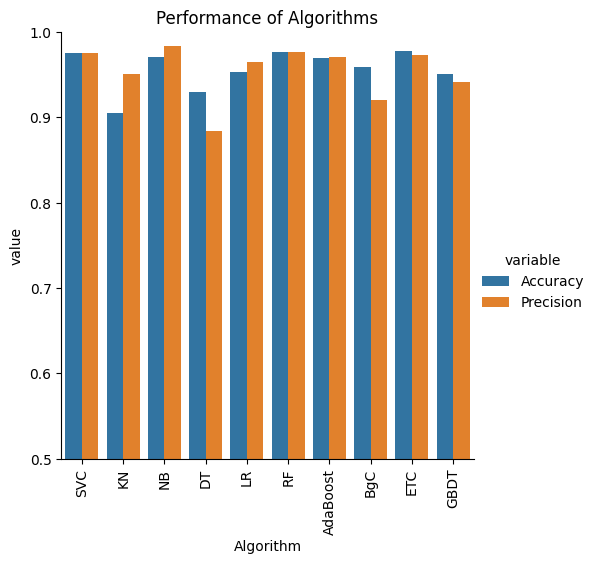

In [393]:
sns.catplot(
    x='Algorithm', 
    y='value', 
    hue='variable', 
    data=performance_df1, 
    kind='bar', 
    height=5
)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.title('Performance of Algorithms')
plt.show()

In [395]:
# performance_df.merge(temp_df, on='Algorithm')

In [397]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))